In [29]:
act_save_2 = np.array( act_save )

In [103]:
joint_num = [ '1st', '2nd', '3rd' ]

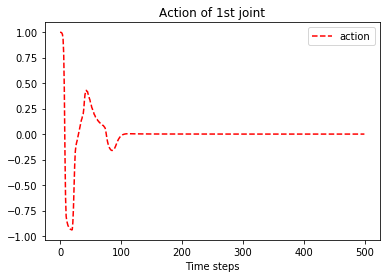

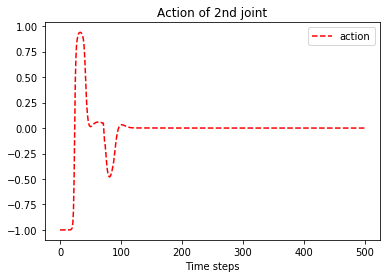

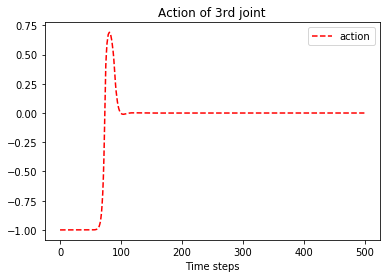

In [107]:
for i in range( env.DoF ):
    xypoints = act_save_2[:,i]
    plt.plot(np.array(xypoints).reshape(-1), 'r--', label='action')
    plt.title('Action of '+ joint_num[i] +' joint')
    plt.xlabel('Time steps')
    # plt.ylabel('Y')
    plt.legend(loc='upper right')
    plt.show()

In [108]:
data_id = '8324'

In [109]:
act_save_3 = np.load( 'act_save-'+ data_id +'.npy' )

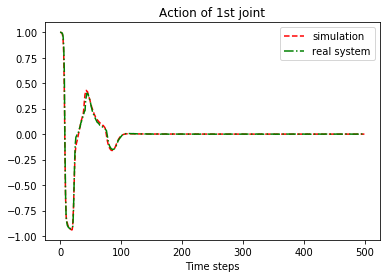

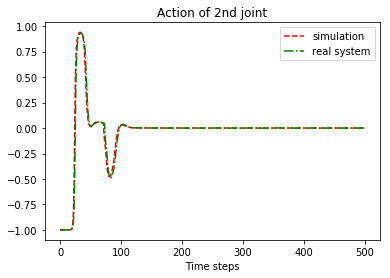

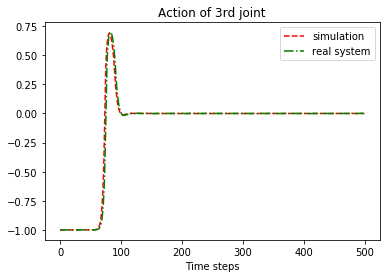

In [111]:
for i in range( env.DoF ):
    xypoints = act_save_2[:,i]
    plt.plot(np.array(xypoints).reshape(-1), 'r--', label='simulation')
    
    xypoints = act_save_3[:,i]
    plt.plot(np.array(xypoints).reshape(-1), 'g-.', label='real system')
    
    plt.title('Action of '+ joint_num[i] +' joint')
    plt.xlabel('Time steps')
    # plt.ylabel('Y')
    plt.legend(loc='upper right')
    plt.show()

In [38]:
vel_save_2 = np.array( vel_save )

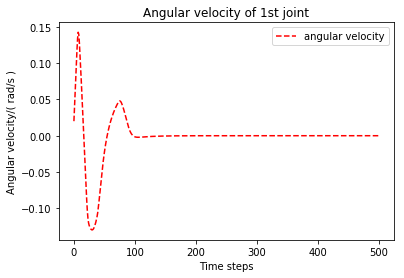

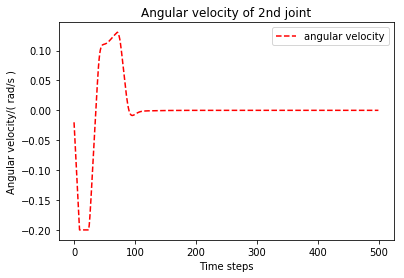

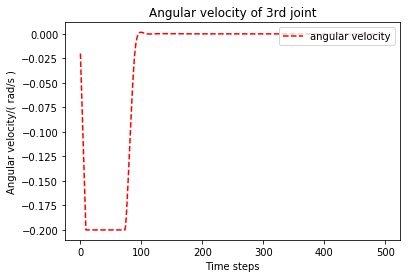

In [120]:
for i in range( env.DoF ):
    xypoints = vel_save_2[:,i]
    plt.plot(np.array(xypoints).reshape(-1), 'r--', label='angular velocity')
    plt.title('Angular velocity of '+ joint_num[i] +' joint')

    plt.xlabel('Time steps')
    plt.ylabel('Angular velocity/( rad/s )')
    plt.legend(loc='upper right')
    plt.show()

In [41]:
state_save_3 = np.load( 'state_save-'+ data_id +'.npy' )

In [42]:
vel_save_3 = state_save_3[:,3:6]

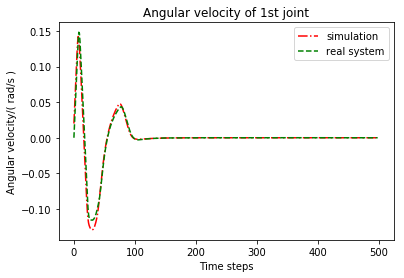

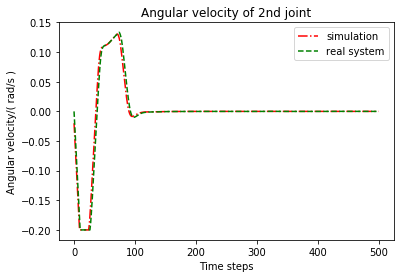

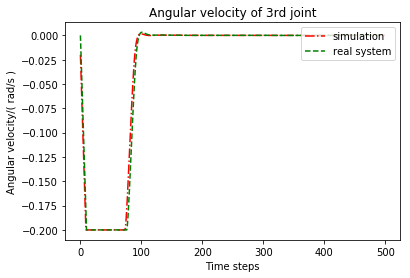

In [119]:
for i in range( env.DoF ):
    
    xypoints = vel_save_2[:,i]
    plt.plot(np.array(xypoints).reshape(-1), 'r-.', label='simulation')
    
    xypoints = vel_save_3[:,i]
    plt.plot(np.array(xypoints).reshape(-1), 'g--', label='real system')
    
    plt.title('Angular velocity of '+ joint_num[i] +' joint')
    
    plt.xlabel('Time steps')
    plt.ylabel('Angular velocity/( rad/s )')
    plt.legend(loc='upper right')
    plt.show()

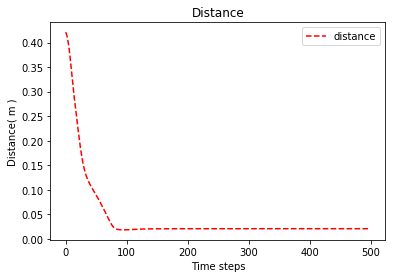

In [44]:
xypoints = dis_save
plt.plot(np.array(xypoints).reshape(-1), 'r--', label='distance')
plt.title('Distance')
plt.xlabel('Time steps')
plt.ylabel('Distance( m )')
plt.legend(loc='upper right')
plt.show()

In [45]:
p_save = np.load('p_save-'+ data_id +'.npy')

In [93]:
# 2 times frequency for sample
dis_save_3 = []
jump = 0
for i in p_save:
    if jump == 0:
        jump = 1
    else:
        jump = 0
        dis_save_3.append( np.linalg.norm( np.array(i[1:]) - np.array([ -0.2986, 0.19425, 0.39555 ])  ) )

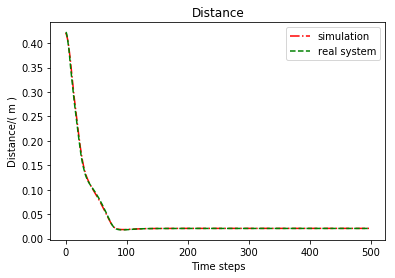

In [102]:
xypoints = dis_save
plt.plot(np.array(xypoints).reshape(-1), 'r-.', label='simulation')

xypoints = dis_save_3
plt.plot(np.array(xypoints).reshape(-1)[34:34+500], 'g--', label='real system')

plt.title('Distance')
plt.xlabel('Time steps')
plt.ylabel('Distance/( m )')
plt.legend(loc='upper right')
plt.show()

In [101]:
# Adjust to obtain a better fit
min_diff = 1000
i_now = 32
i_min = -1
for i in range(20):
    tmp = sum( abs(    np.array( dis_save ).reshape(-1) - np.array( dis_save_3 ).reshape(-1)[i_now-10+i:i_now-10+i+500]    ) )
    if tmp < min_diff:
        min_diff = tmp
        i_min = i_now-10+i
        
i_min

34